# 2889 Problem

[원 트윗 출처](https://twitter.com/rosinality/status/869787582443466752)  
<div style="float: left; clear: right;">
    <img alt="2889 problem" src="https://pbs.twimg.com/media/DBIE0s0UwAACNRv.jpg" width="400">
    <br><br>
</div>

<h2 style="clear: left;">원하는 것</h2>
<div style="float: left; clear: left;">
    ![answer](https://pbs.twimg.com/media/DBIbKsgVYAAtlkS.jpg)
    <br>
</div>

<p style="clear: left;">은닉 계층을 하나만 두고 머신 러닝으로 예측해보자!</p>

### Input dataset

In [1]:
import numpy as np
np.random.seed(42)
X = np.array([
    [7, 1, 1, 1],
    [8, 8, 0, 9],
    [2, 1, 7, 2],
    [6, 6, 6, 6],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [7, 6, 6, 2],
    [9, 3, 1, 3],
    [0, 0, 0, 0],
    [5, 5, 5, 5],
    [8, 1, 9, 3],
    [8, 0, 9, 6],
    [4, 3, 9, 8],
    [9, 4, 7, 5],
    [9, 0, 3, 8],
    [3, 1, 4, 8],
])
Y = np.array([[0, 6, 0, 4, 0, 0, 2, 1, 4, 0, 3, 5, 3, 1, 4, 2]]).T

### One hot encoding

In [2]:
T = np.zeros((*X.shape, 10))
print(T.shape)
for idx, row in enumerate(T):
    row[range(X.shape[-1]), X[idx]] = 1

(16, 4, 10)


In [10]:
X0 = T.reshape(16, 40)
X0.shape

(16, 40)

## 구조
- input layer: 4x10=40
- hidden node: 10
- output node: 1

In [56]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_grad(x):
    return (1 - sigmoid(x)) * sigmoid(x)

def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    grad = np.zeros(x)
    grad[x >= 0] = 1
    return grad

def mean_squared_error(y, t):
    return 0.5 * np.mean((y-t)**2)

In [132]:
# Relu면 2, Sigmoid면 1
scale = np.sqrt(1.0 / 40)
W0 = scale * np.random.randn(40, 10)
b0 = np.zeros(10)

scale = np.sqrt(1.0 / 10)
W1 = scale * np.random.randn(10, 1)
b1 = np.zeros(1)

error_history = []



```python
dx = dout @ self.W.T
self.dW = self.x.T @ dout
self.db = np.sum(dout, axis=0)
return dx
```

In [133]:
for i in range(50):
    # forward propagation
    A0 = X0 @ W0 + b0 # (16 x 40) @ (40 x 10)= (16 x 10)
    Y1 = sigmoid(A0)  # (16 x 10)
    Y2 = Y1 @ W1 + b1 # (16 x 10) @ (10 x 1) = (16 x 1)

    # 예측한 것과 정답을 비교해 error를 산출
    # E2 = Y - Y2
    E2 = mean_squared_error(Y2, Y)
    error_history.append(E2)
    # 에러와 나아갈 방향을 곱한다
    delta2 = E2 * Y2  # (16 x 1)

    # 이부분이 바로 역전파 부분
    # 히든레이어의 오차와 delta값을 정한다.
    E1 = delta2 @ W1.T  # (16 x 1) @ (1 x 10) = (16 x 10)
    delta1 = E1 * sigmoid_grad(Y1)  # (16 x 10)

    # 갱신
    W1 -= 0.01 * (Y1.T @ delta2)  # (10 x 16) @ (16 x 1) = (10 x 1)
    W0 -= 0.01 * (X0.T @ delta1)  # (40 x 16) @ (16 x 10) = (40 x 10)
    b1 -= 0.01 * 1 * np.sum(delta2, axis=0)
    b0 -= 0.01 * 1 * np.sum(delta1, axis=0)
    # print("W0 mean: ", W0.mean())
    # print("W1 mean: ", W1.mean())
    # print("b0 mean: ", b0.mean())
    # print("b1 mean: ", b1.mean())

error:  4.92573829849
error:  4.78453369191


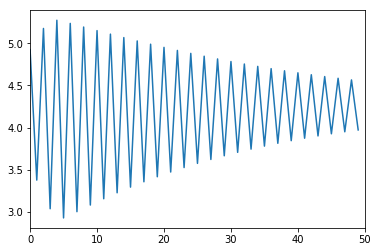

In [134]:
import matplotlib.pyplot as plt
plt.plot(error_history)
plt.xlim(0, 50)
plt.show();

In [142]:
A0 = X0 @ W0 + b0
Y1 = sigmoid(A0)
Y2 = Y1 @ W1 + b1
print(Y2)

[[-0.06898345]
 [-0.08148264]
 [-0.12036311]
 [-0.16684199]
 [-0.14514586]
 [-0.12772283]
 [-0.11890941]
 [-0.09170751]
 [-0.07682953]
 [-0.15837725]
 [-0.07933739]
 [-0.14245897]
 [-0.12851169]
 [-0.13651676]
 [-0.15104808]
 [-0.13704426]]


### Test Case

In [50]:
def refine(x):
    '''
    some refinement process
    '''
    return x

In [51]:
def test(problem, answer):
    _problem = problem
    _real_answer = answer
    try:
        _X = refine(_problem)
        _Y = network.predict(_X)
    except:
        _X, _Y = 0, 0
    print("====== TEST CASE =====")
    print("problem\t\t:", _problem)
    print("real answer\t:", _real_answer)
    print("got answer\t:", _Y)
    print("======================")

In [52]:
test("7111", "0")
test("8809", "6")
test("7662", "2")

====== TEST CASE =====
problem		: 7111
real answer	: 0
got answer	: 0
====== TEST CASE =====
problem		: 8809
real answer	: 6
got answer	: 0
====== TEST CASE =====
problem		: 7662
real answer	: 2
got answer	: 0
